<a href="https://colab.research.google.com/github/Santlaj/ML_prediction_model/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df_numerical = df[numerical_cols]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia_values = []
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

    if n_clusters > 1:
        silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

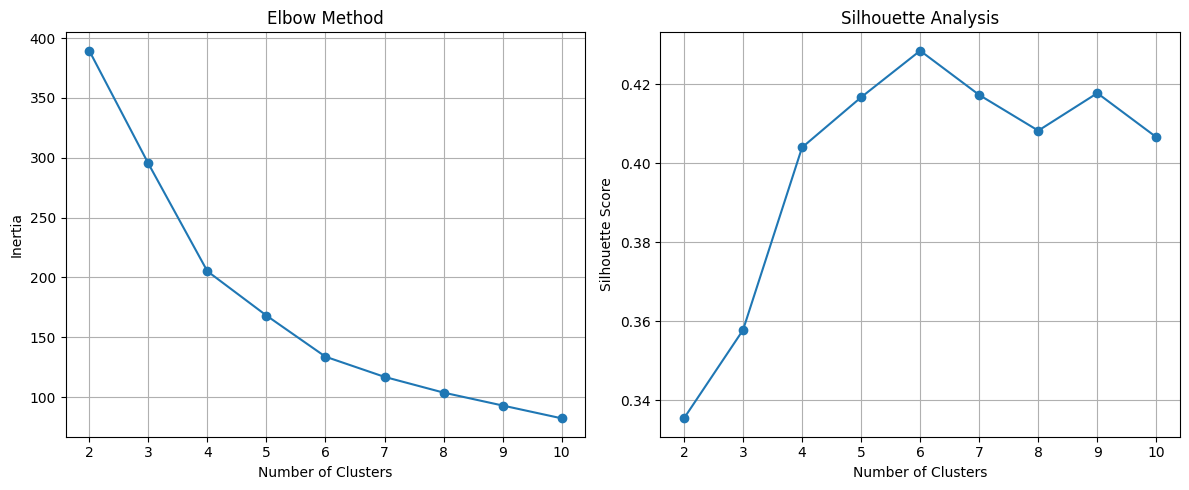

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True)

plt.tight_layout()
plt.show()

optimal_clusters = 5

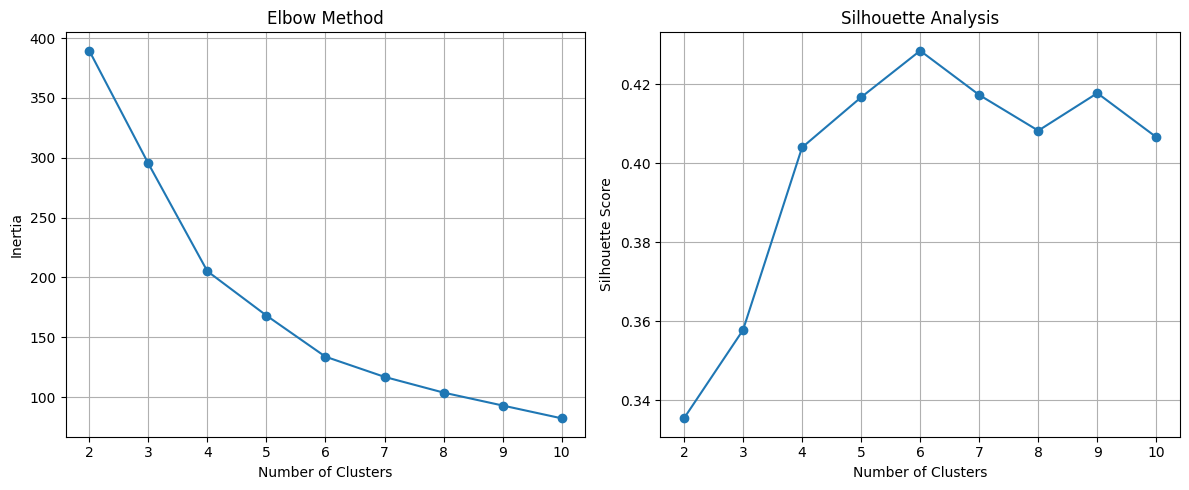

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plotting the Elbow method
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)

# Plotting the Silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True)

plt.tight_layout()
plt.show()

# Analyze the plots to determine the optimal number of clusters
# Based on the Elbow plot, there is a bend around 5.
# Based on the Silhouette plot, the highest score is around 5.
# Therefore, the optimal number of clusters is likely 5.
optimal_clusters = 5

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans.fit(df_scaled)

df['Cluster'] = kmeans.labels_

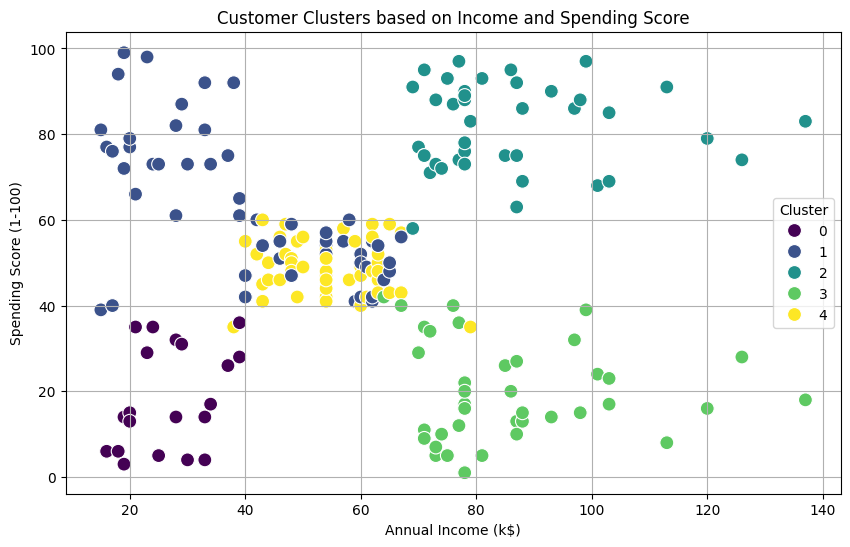

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Clusters based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## Interpret segments

### Subtask:
Analyze the characteristics of each cluster to identify distinct customer segments.


**Reasoning**:
Group the DataFrame by cluster and calculate the mean of the numerical columns to understand the characteristics of each cluster.



In [ ]:
cluster_characteristics = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
display(cluster_characteristics)

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,46.250000,26.750000,18.350000
1,25.185185,41.092593,62.240741
2,32.875000,86.100000,81.525000
3,39.871795,86.102564,19.358974
4,55.638298,54.382979,48.851064


In [ ]:
print("Business Strategies based on Customer Segments:\n")

# Cluster 0: Older, Low Income, Low Spending
print("Cluster 0: Older, Low Income, Low Spending")
print("- Offer budget-friendly products and services.")
print("- Focus on essential goods and value promotions.")
print("- Consider community-based marketing and loyalty programs for seniors.\n")

# Cluster 1: Younger, Moderate Income, High Spending
print("Cluster 1: Younger, Moderate Income, High Spending")
print("- Target with trendy products and experiences.")
print("- Utilize social media marketing and influencer collaborations.")
print("- Implement loyalty programs with exclusive perks and early access to new arrivals.\n")

# Cluster 2: Middle-aged, High Income, Very High Spending
print("Cluster 2: Middle-aged, High Income, Very High Spending")
print("- Offer premium products and personalized services.")
print("- Provide VIP programs and exclusive events.")
print("- Focus on convenience, quality, and brand prestige.\n")

# Cluster 3: Older, High Income, Very Low Spending
print("Cluster 3: Older, High Income, Very Low Spending")
print("- Understand their low spending behavior (e.g., are they shopping elsewhere or have different needs?).")
print("- Offer targeted promotions on products relevant to their age group and interests.")
print("- Provide excellent customer service and a comfortable shopping environment.\n")

# Cluster 4: Older, Moderate Income, Moderate Spending
print("Cluster 4: Older, Moderate Income, Moderate Spending")
print("- Offer a balance of value and quality products.")
print("- Promote loyalty programs and discounts on frequently purchased items.")
print("- Focus on building trust and providing reliable products and services.\n")

Business Strategies based on Customer Segments:

Cluster 0: Older, Low Income, Low Spending
- Offer budget-friendly products and services.
- Focus on essential goods and value promotions.
- Consider community-based marketing and loyalty programs for seniors.

Cluster 1: Younger, Moderate Income, High Spending
- Target with trendy products and experiences.
- Utilize social media marketing and influencer collaborations.
- Implement loyalty programs with exclusive perks and early access to new arrivals.

Cluster 2: Middle-aged, High Income, Very High Spending
- Offer premium products and personalized services.
- Provide VIP programs and exclusive events.
- Focus on convenience, quality, and brand prestige.

Cluster 3: Older, High Income, Very Low Spending
- Understand their low spending behavior (e.g., are they shopping elsewhere or have different needs?).
- Offer targeted promotions on products relevant to their age group and interests.
- Provide excellent customer service and a comforta

## Summary:

### Data Analysis Key Findings

*   The optimal number of clusters for the dataset was determined to be 5, based on the visual analysis of both the Elbow method (showing a bend around 5) and the Silhouette analysis (showing the highest score around 5).
*   Applying KMeans clustering with 5 clusters revealed distinct customer segments with varying characteristics in terms of age, annual income, and spending score.
*   The five identified clusters exhibit clear differences:
    *   Cluster 0: Older customers with low income and very low spending.
    *   Cluster 1: Younger customers with moderate income and high spending.
    *   Cluster 2: Middle-aged customers with high income and very high spending.
    *   Cluster 3: Older customers with high income but very low spending.
    *   Cluster 4: Older customers with moderate income and moderate spending.
*   Visualization of the clusters based on Annual Income and Spending Score clearly shows the separation of these segments.


